In [15]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

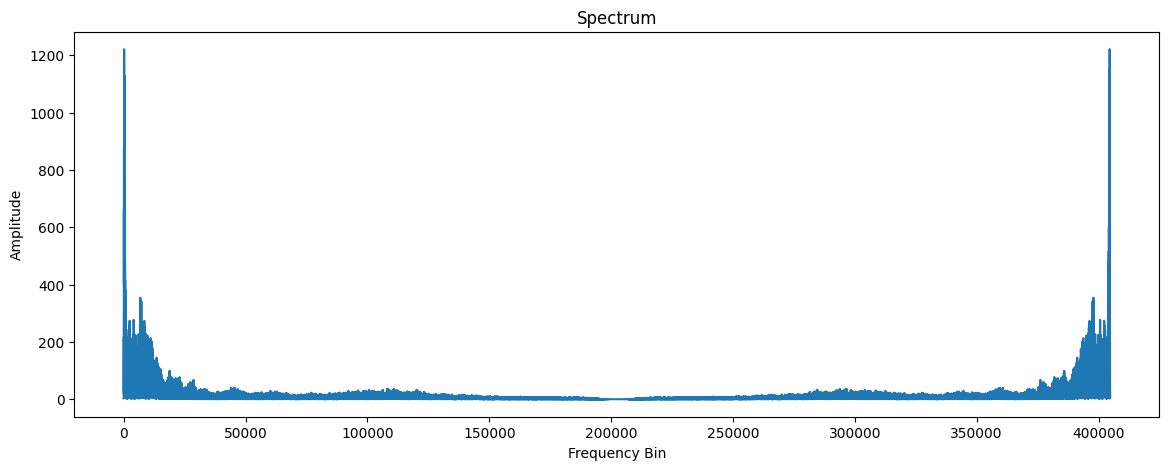

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load the audio file
y, sr = librosa.load('harvard.wav')

# FFT to transform the speech signal to its spectral domain
D = np.fft.fft(y)

# Plot the amplitude part of the spectral components
plt.figure(figsize=(14, 5))
plt.plot(np.abs(D))
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()

A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.


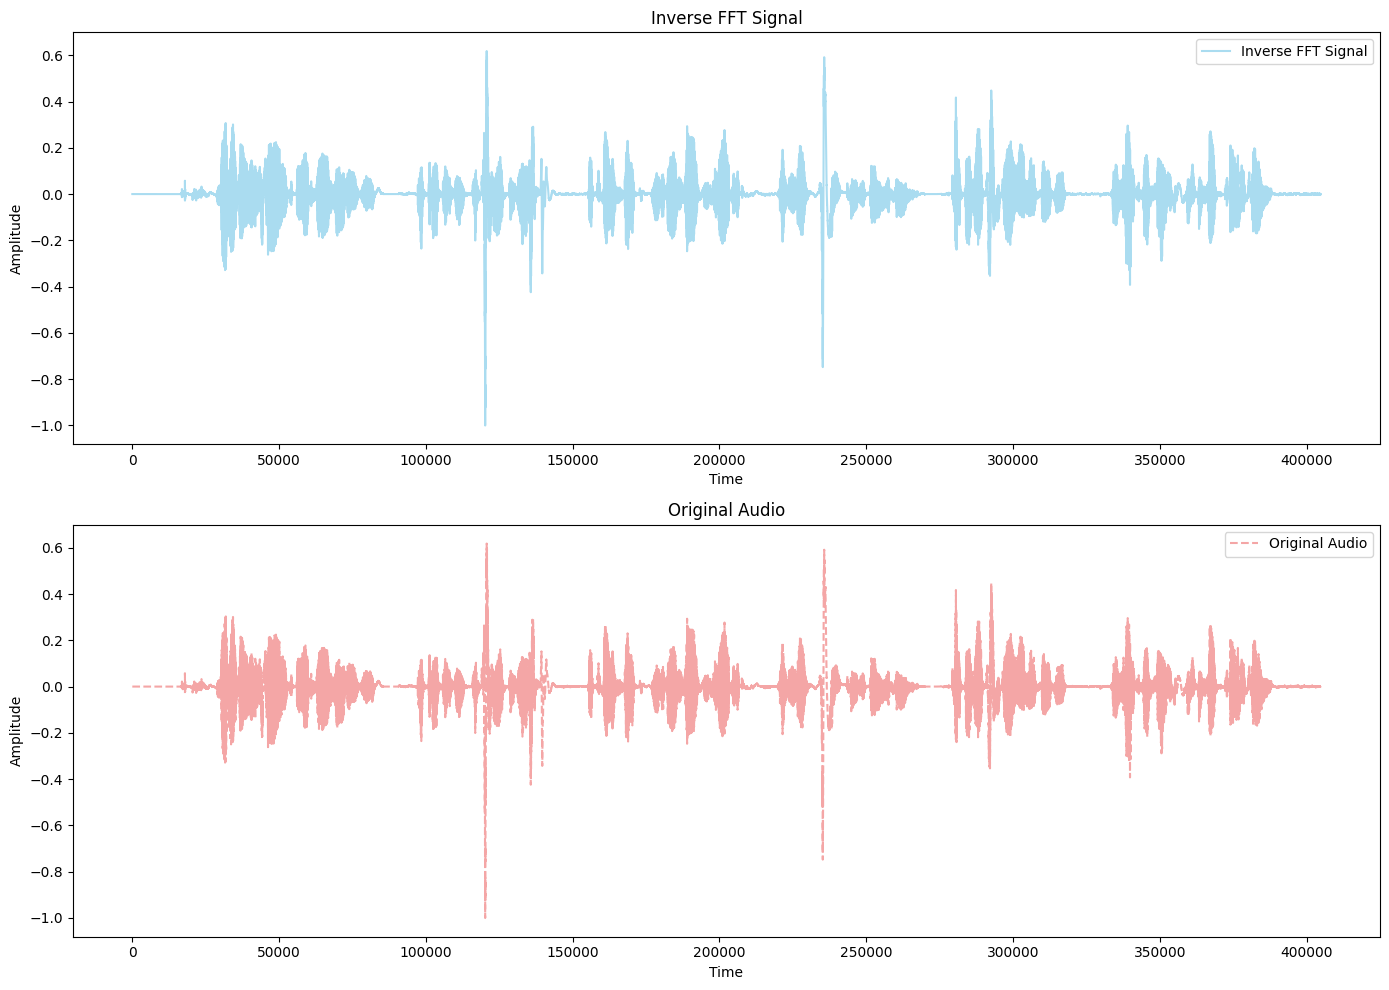

In [24]:
# Inverse FFT to transform the frequency spectrum to time domain
y_inv = np.fft.ifft(D)

# Compare the generated time domain signal with the original signal
fig, axs = plt.subplots(2, figsize=(14, 10))

# Plot the inverse FFT signal
axs[0].plot(y_inv.real, color='skyblue', linestyle='-', label='Inverse FFT Signal', alpha=0.7)

# Plot the original audio
axs[1].plot(y, color='lightcoral', linestyle='--', label='Original Audio', alpha=0.7)

axs[0].set(title='Inverse FFT Signal', xlabel='Time', ylabel='Amplitude')
axs[1].set(title='Original Audio', xlabel='Time', ylabel='Amplitude')

axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()

A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

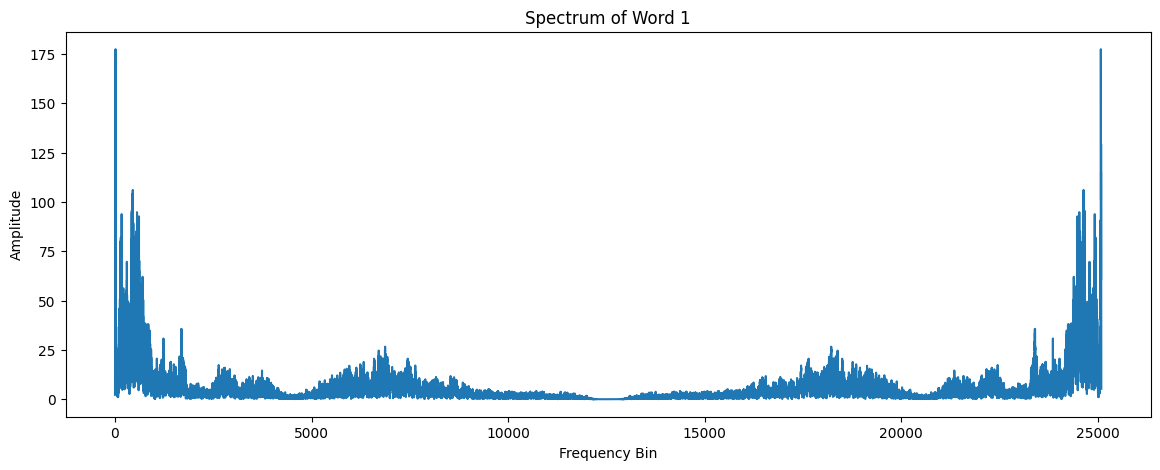

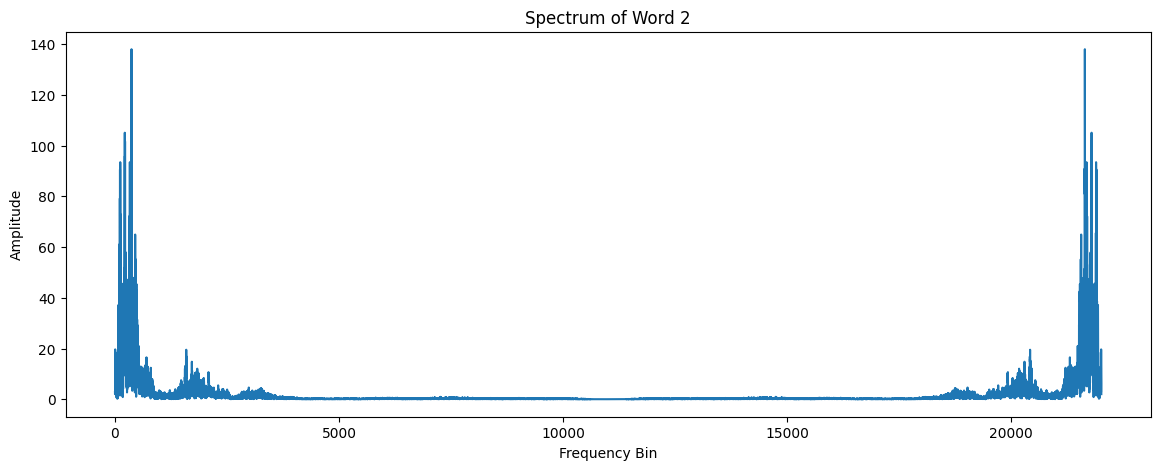

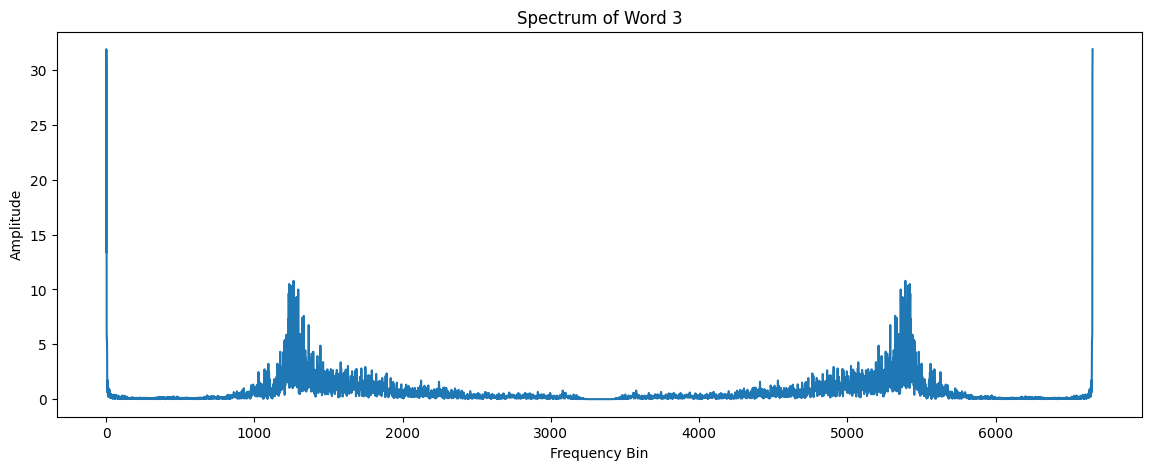

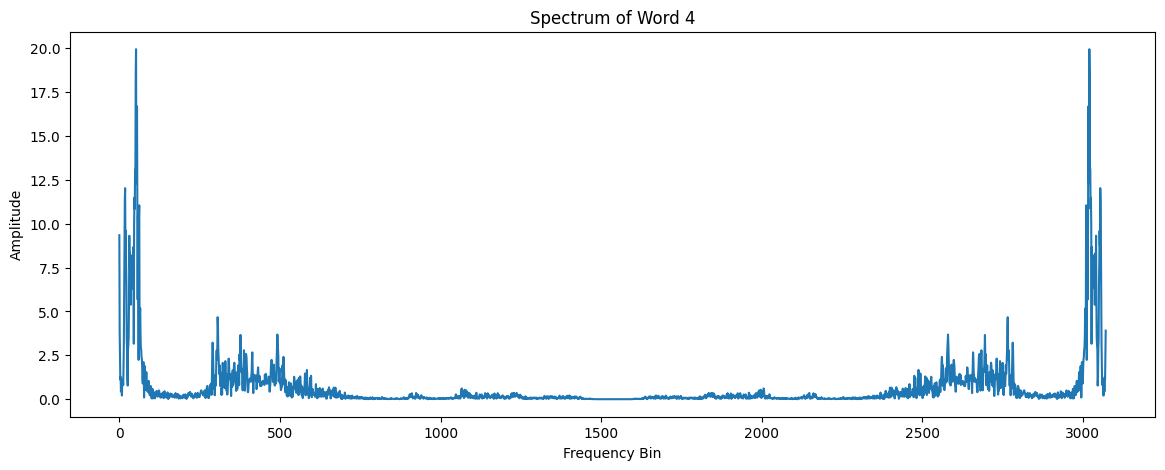

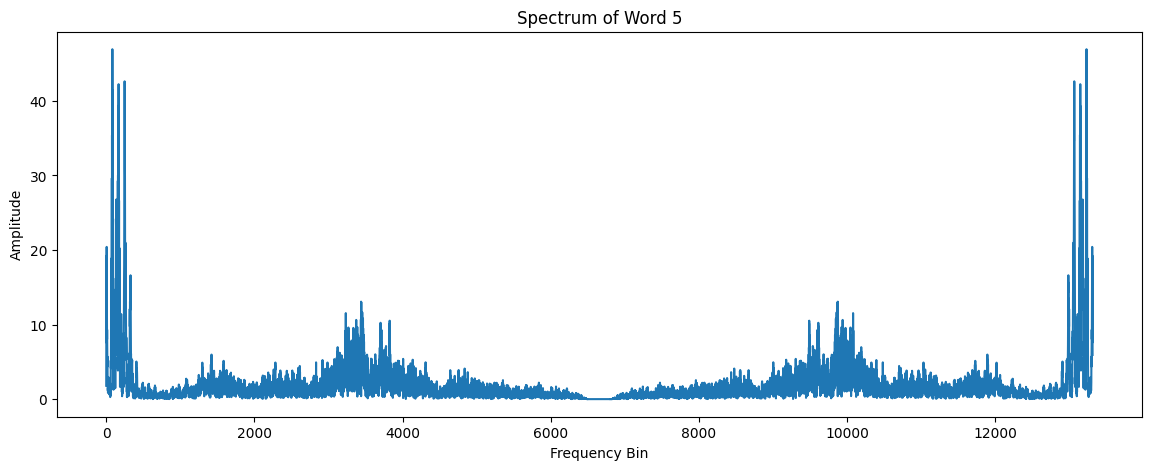

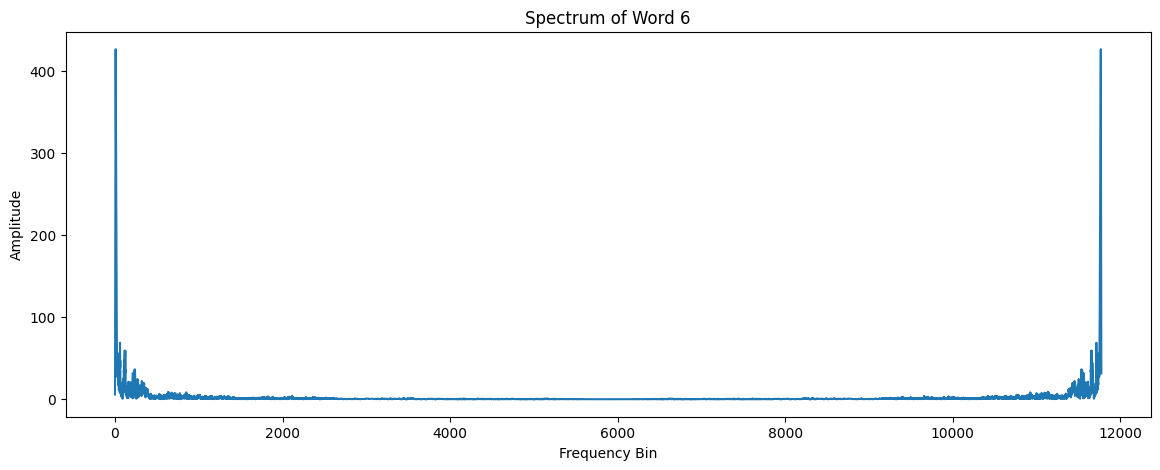

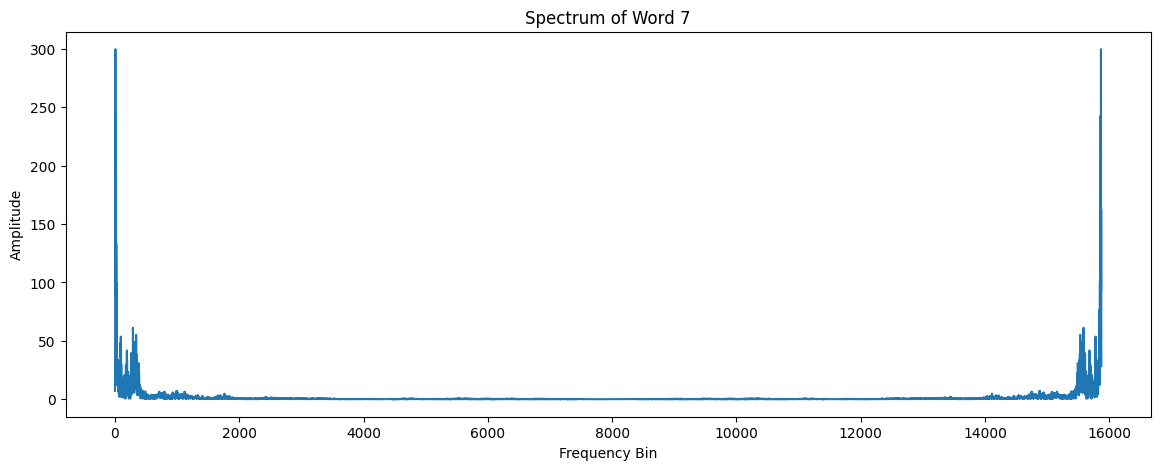

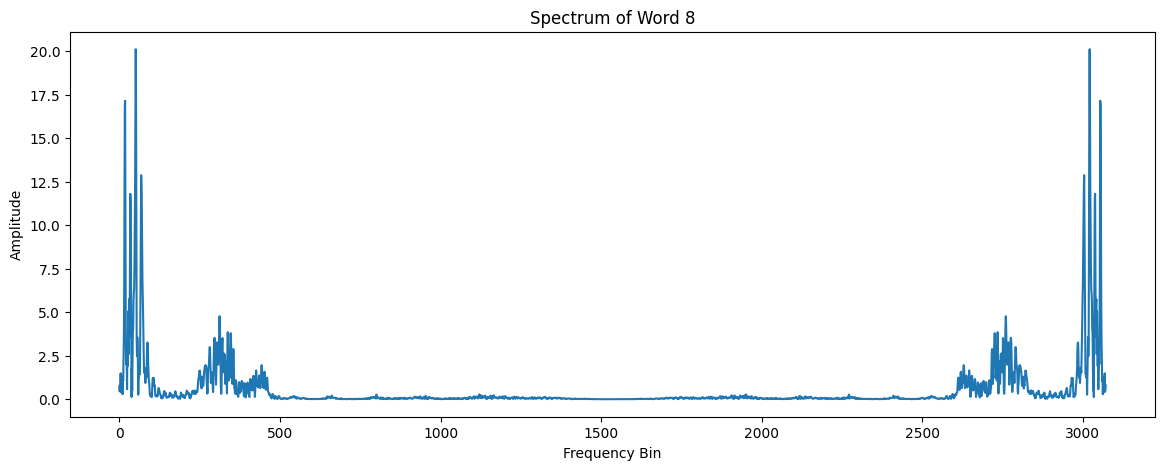

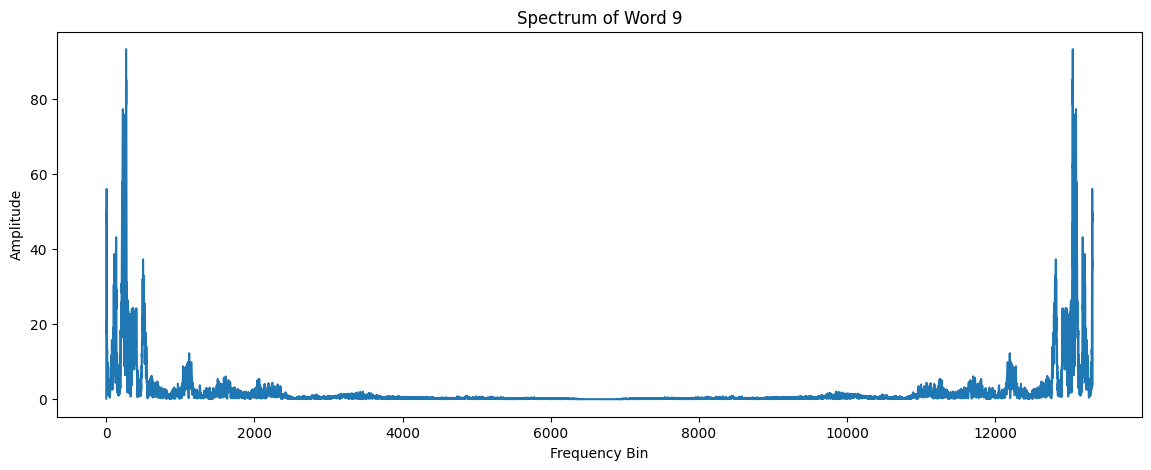

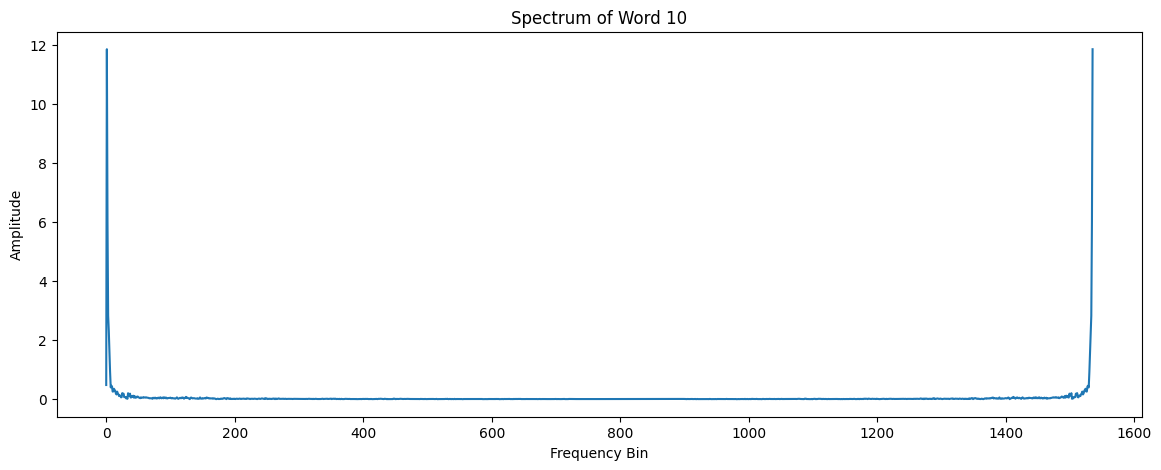

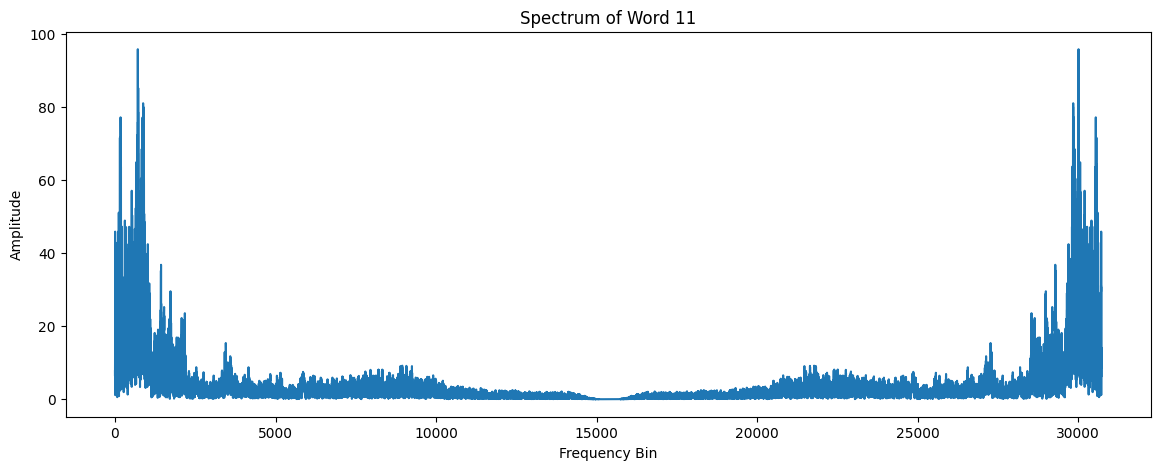

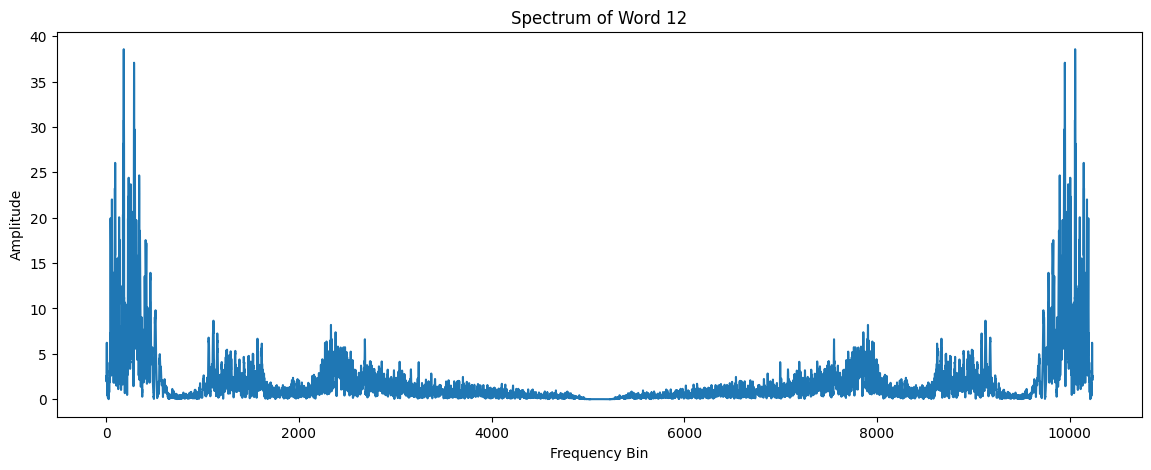

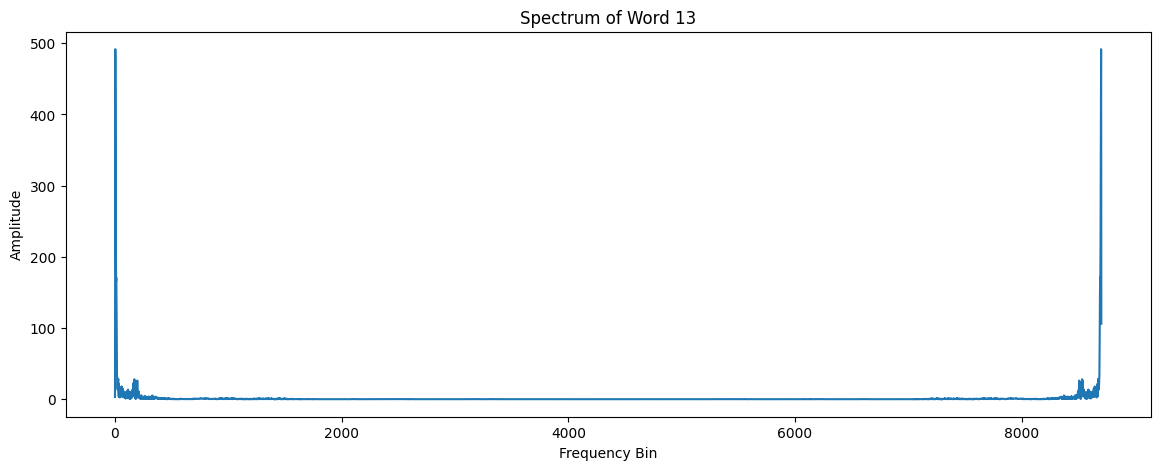

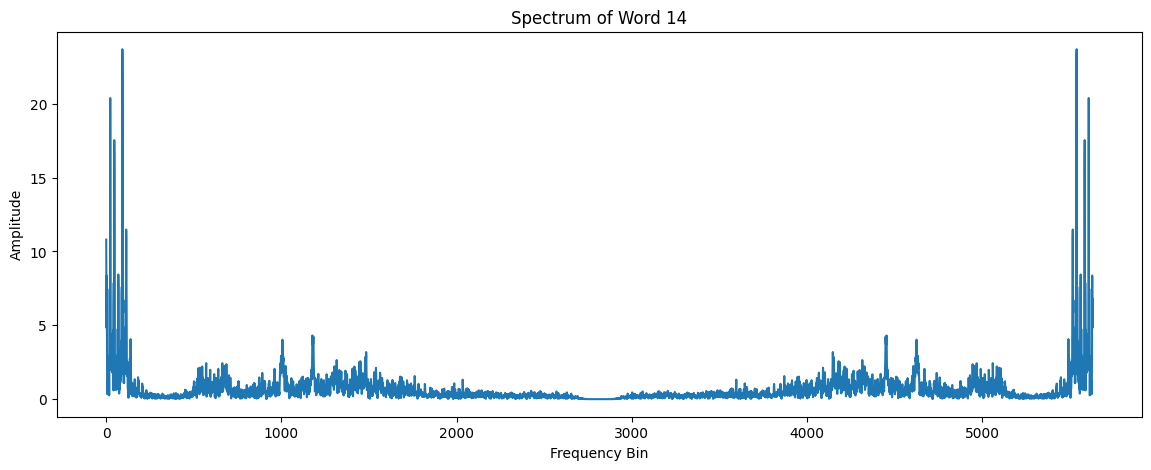

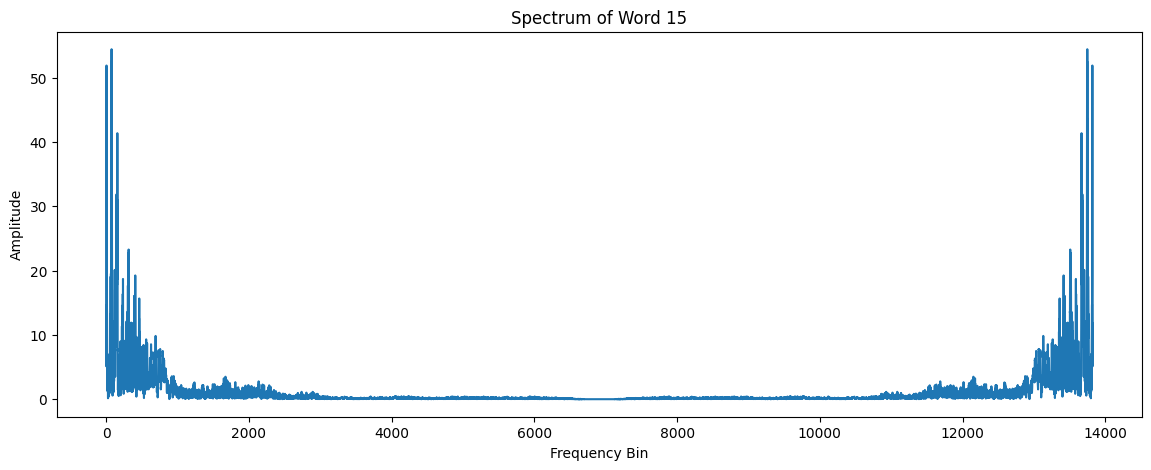

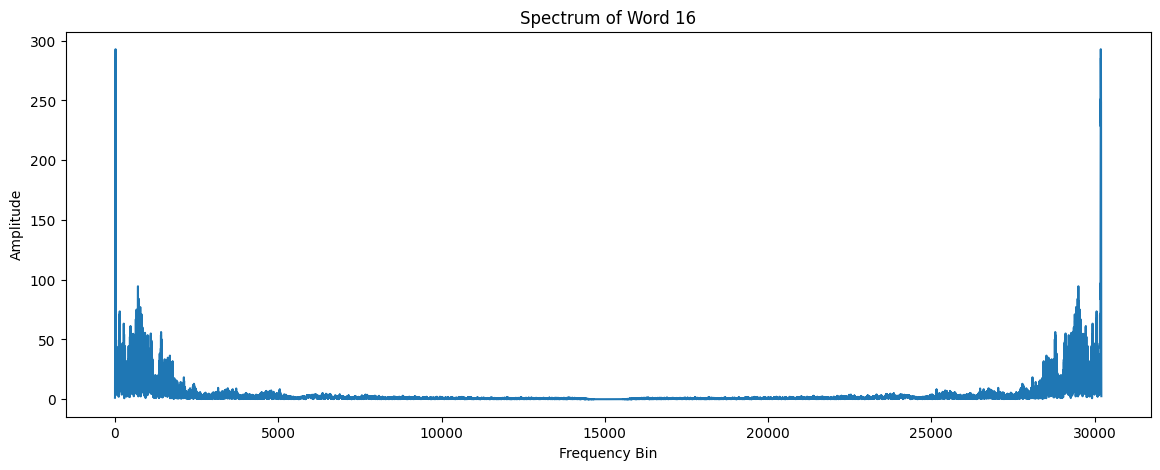

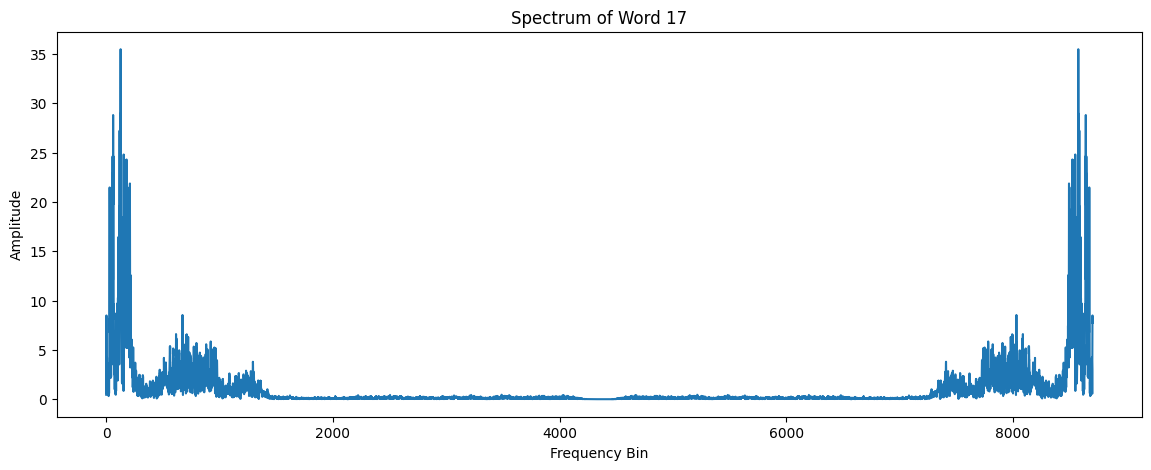

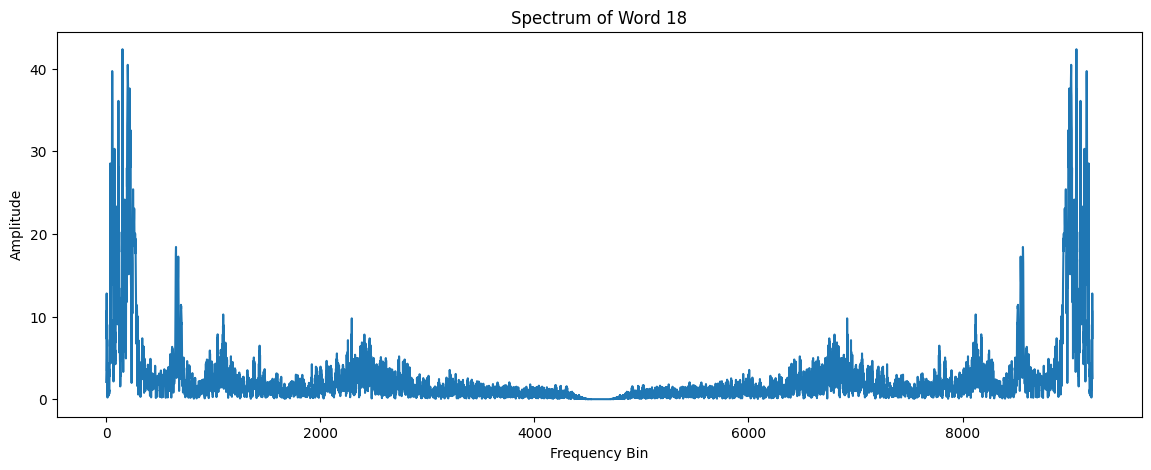

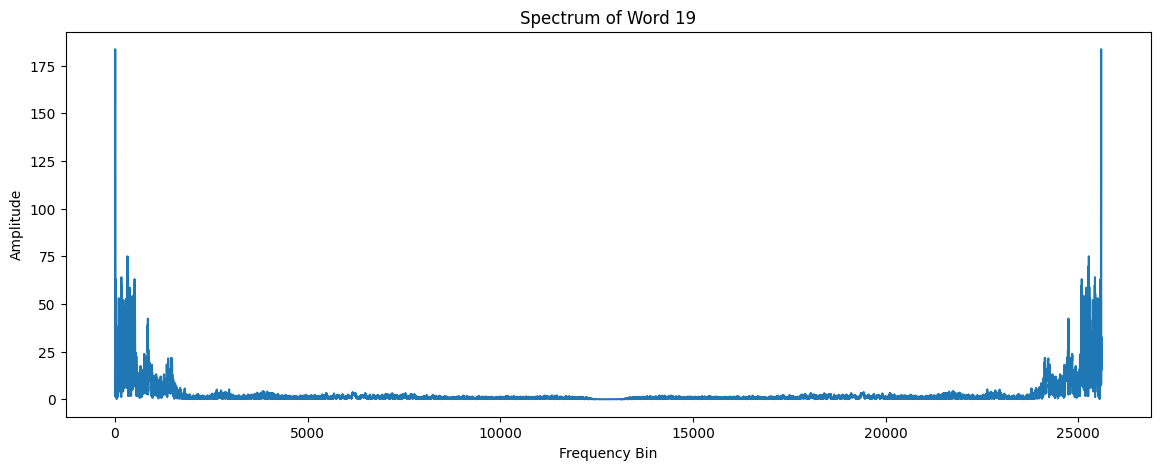

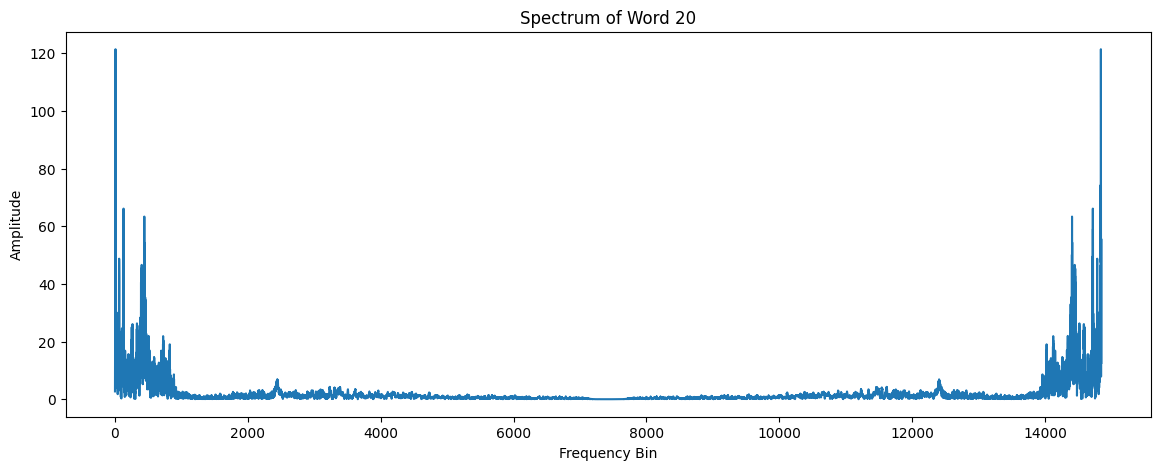

In [35]:
threshold = np.percentile(np.abs(y), 75)  # Adjust the percentile as needed

# Split the speech signal into segments based on the amplitude threshold
segments = librosa.effects.split(y, top_db=-20*np.log10(threshold))

# Perform FFT on each word segment and plot the spectrum
for i, (start, end) in enumerate(segments):
    word = y[start:end]
    D_word = np.fft.fft(word)

    plt.figure(figsize=(14, 5))
    plt.plot(np.abs(D_word))
    plt.title(f'Spectrum of Word {i+1}')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Amplitude')
    plt.show()

A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

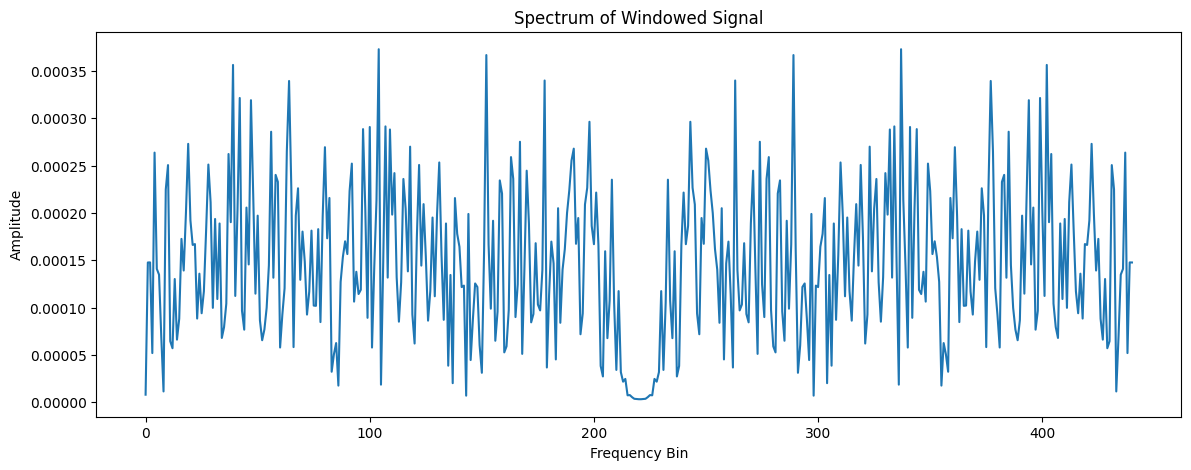

In [19]:
import scipy.signal as signal

# Rectangular window of 20 ms sampled at 22.5 KHz
frame_length = int(0.02*sr)
win = signal.windows.boxcar(frame_length)

# FFT to analyze the spectral components
D_win = np.fft.fft(y[:frame_length] * win)

# Plot the spectral components
plt.figure(figsize=(14, 5))
plt.plot(np.abs(D_win))
plt.title('Spectrum of Windowed Signal')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()



A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this.

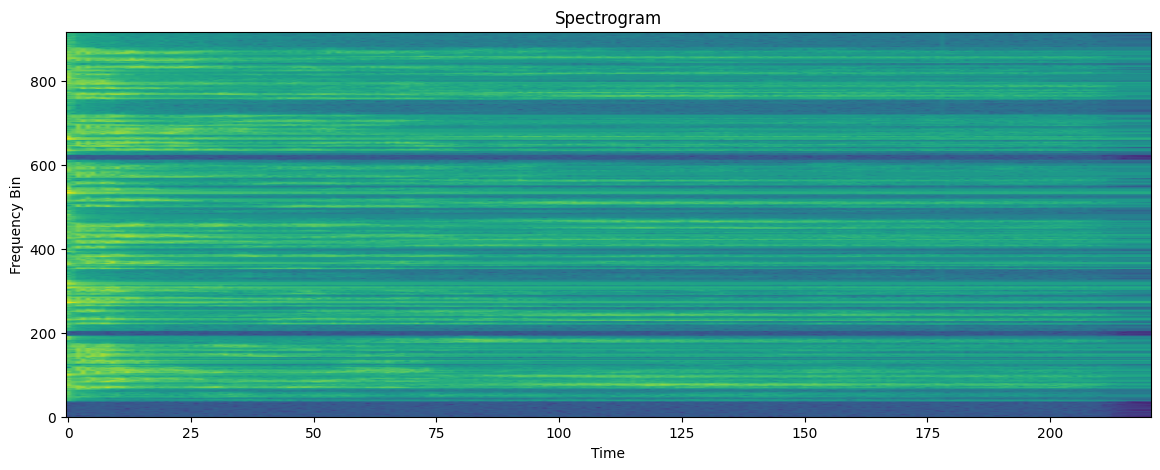

In [20]:
# Break the speech signal into window lengths of 20 ms intervals
frames = librosa.util.frame(y, frame_length=frame_length, hop_length=frame_length)

# FFT to analyze the spectral components
D_frames = np.fft.rfft(frames * win[:, np.newaxis], axis=0)

# Stack these frequency components as columns in a matrix
D_matrix = np.column_stack(D_frames)

# Use a heatmap plot to display the matrix
plt.figure(figsize=(14, 5))
plt.imshow(20*np.log10(np.abs(D_matrix)), aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency Bin')
plt.show()

A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots

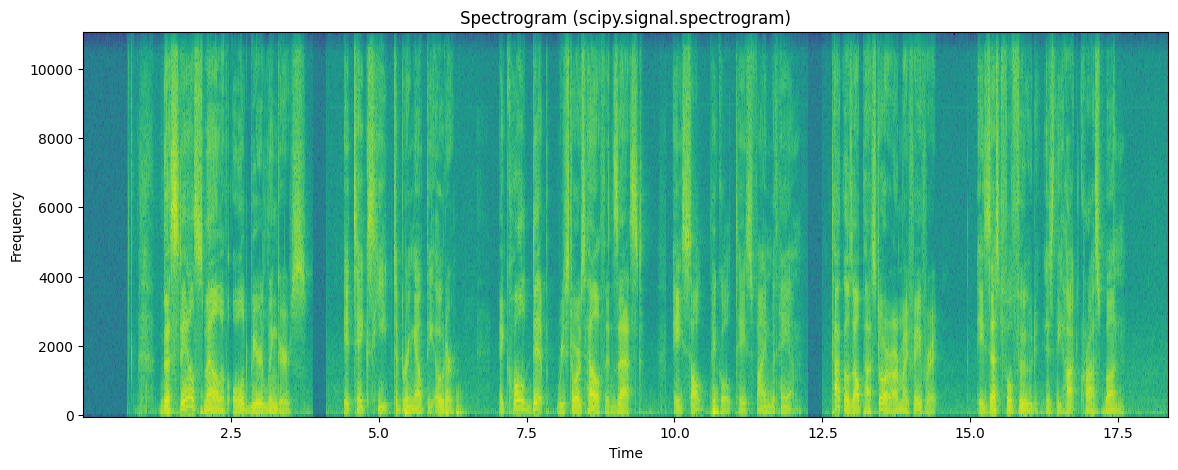

In [21]:
# Use scipy's signal.spectrogram function to plot the spectrogram of the speech signal
frequencies, times, Sxx = signal.spectrogram(y, sr)
plt.figure(figsize=(14, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title('Spectrogram (scipy.signal.spectrogram)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()